In [1]:
import matplotlib.pyplot as  plt
import numpy as np
import cv2
from sklearn import datasets
from sklearn import metrics
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
#Load the digits dataset
digits = datasets.load_digits()
print(digits.keys())
digits['target']
# target = label of image 

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


array([0, 1, 2, ..., 8, 9, 8])

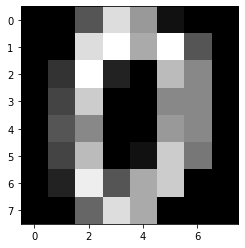

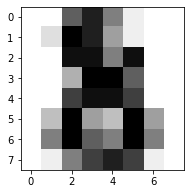

In [3]:
#Display the first digit
plt.imshow(digits.images[0],'gray')
plt.show()
plt.figure(1,figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [4]:
# split the images using sklearn's train_test_split()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state =0)

In [15]:
type(digits.data)

numpy.ndarray

In [5]:
##  KNN 

In [6]:
#  init: n_neighbors=5 
n = 3 
clf_neigh = KNeighborsClassifier(n_neighbors = n)
#traning process
clf_neigh.fit(X_train, y_train)
# test and predict y label =? x_test
y_predict_knn = clf_neigh.predict(X_test) 

# evaluate the performance: accuracy
accuracy_knn = accuracy_score(y_test,y_predict_knn,normalize=True)
# metrics.precision_score(y_test,y_predict, average='macro')
# average_recall
average_recall_knn =recall_score(y_test, y_predict_knn, average='macro')
# confusion matrix 
confusion_matrix_knn = confusion_matrix(y_test, y_predict_knn)

In [7]:
# SVM 

In [8]:
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)
y_predict_svm = clf_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test,y_predict_svm,normalize=True)
average_recall_svm =recall_score(y_test, y_predict_svm, average='macro')
confusion_matrix_svm = confusion_matrix(y_test, y_predict_svm)

In [9]:
# RF: random forest

In [10]:
# RF: random forest
clf_RF = RandomForestClassifier()
clf_RF.fit(X_train, y_train)


y_predict_RF = clf_RF.predict(X_test)

accuracy_RF = accuracy_score(y_test,y_predict_RF,normalize=True)
average_recall_RF = recall_score(y_test, y_predict_RF, average='macro')
confusion_matrix_RF = confusion_matrix(y_test, y_predict_RF)

In [11]:
# output 
#
print("The output of split the train_test data by KNN:")
print(f"The accuracy (n_neighbors = {n}) is {accuracy_knn:.3f}")
print("The average recall is %.3f"  % average_recall_knn)
print("The condusion matrix is: \n", confusion_matrix_knn)

The output of split the train_test data by KNN:
The accuracy (n_neighbors = 3) is 0.987
The average recall is 0.987
The condusion matrix is: 
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  2  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0  0  0 47]]


In [12]:
print("The output of split the train_test data by SVM:")
print(f"The accuracy is %.3f" % accuracy_svm)
print("The average recall is %.3f"  % average_recall_svm)
print("The condusion matrix is: \n", confusion_matrix_svm)

The output of split the train_test data by SVM:
The accuracy is 0.991
The average recall is 0.991
The condusion matrix is: 
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


In [13]:
print("The output of split the train_test data by RF:")
print(f"The accuracy is %.3f" %accuracy_RF)
print("The average recall is %.3f" % average_recall_RF)
print("The condusion matrix is: \n", confusion_matrix_RF)

The output of split the train_test data by RF:
The accuracy is 0.982
The average recall is 0.982
The condusion matrix is: 
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 1  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  0  0  0  0  1 46  0]
 [ 0  0  0  1  0  1  0  0  0 45]]


In [14]:
# Therefore, the default hyper-parameter values for SVM and RF, and for KNN, use the best number of neighbours, 
#the classifer SVM has better classification effect.